*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 22-2:  Multi-linear regression of gestational days

We will use newborn data set from Lab 16, [babies.data](https://www.stat.berkeley.edu/~statlabs/data/babies.data).  This data is from a sample of newborns born between 1960 and 1967 in California in a major hospital system.

The columns are:<br>
bwt: Birth weight in ounces (999 unknown)<br>
gestation: Length of pregnancy in days (999 unknown)<br>
parity: 0= first born, 9=unknown<br>
age: mother's age in years (99 unknown)<br>
height: mother's height in inches (99 unknown)<br>
weight: Mother's prepregnancy weight in pounds (999 unknown)<br>
smoke: Smoking status of mother: 0=not now, 1=yes now, 9=unknown

Since missing data is indicated by different values in different columns, we need to explicitly list these values when reading in the dataset, by using the parameter `na_values = {"gestation":"999","age":"99","bwt":"999","height":"99","weight":"999"}`.  The code to remove these outliers from the dataset is below.  

a) Compute the correlation matrix and its heatmap (Lab 20) for the dataset.

b) Compute a linear model where the dependent variable is the number of gestational days and the independent variables are the birth weight and the mother's age, height, and weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

babies = pd.read_csv("../../data/babies.data",sep = "\s+", \
                     na_values = {"gestation":"999","age":"99","bwt":"999","height":"99","weight":"999"})
babies = babies.dropna(axis = 0)

babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0
1,113,282.0,0,33.0,64.0,135.0,0
2,128,279.0,0,28.0,64.0,115.0,1
4,108,282.0,0,23.0,67.0,125.0,1
5,136,286.0,0,25.0,62.0,93.0,0


In [4]:
corr_matrix = babies.corr()
corr_matrix

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.410339,-0.045552,0.031162,0.201066,0.155568,-0.098060
gestation,0.410339,1.000000,0.079586,-0.050761,0.068583,0.022265,-0.015480
parity,-0.045552,0.079586,1.000000,-0.352012,0.042789,-0.098113,-0.051610
age,0.031162,-0.050761,-0.352012,1.000000,-0.005091,0.147596,0.003042
height,0.201066,0.068583,0.042789,-0.005091,1.000000,0.436313,0.016878
weight,0.155568,0.022265,-0.098113,0.147596,0.436313,1.000000,0.008756
smoke,-0.098060,-0.015480,-0.051610,0.003042,0.016878,0.008756,1.000000


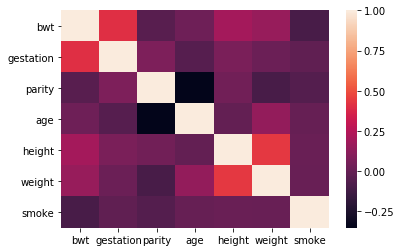

In [5]:
sns.heatmap(corr_matrix)

In [7]:
lm = smf.ols(formula = "gestation ~ bwt + age + height + weight",data = babies).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gestation   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     61.89
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           1.66e-47
Time:                        13:38:07   Log-Likelihood:                -4847.7
No. Observations:                1184   AIC:                             9705.
Df Residuals:                    1179   BIC:                             9731.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    243.8436     11.270     21.637      0.000     221.732     265.955
bwt            0.3634      0.024     15.402      0.000       0.317       0.410
age           -0.1618      0.074     -2.190      0.029      -0.307      -0.017
height        -0.0066      0.189     -0.035      0.972      -0.377       0.364
weight        -0.0258      0.023     -1.122      0.262      -0.071       0.019
==============================================================================
Omnibus:                      262.343   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3724.310
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      11.604   Cond. No.                     5.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. From the correlation matrix, which variables (that are not number of gestational days) are most and least correlated with gestational days?
2. Recall that the p-value for a variable is the probabiliy that the variable appears to affect birth weight when it really doesn't.  Do any of the variables have a large enough p-value that you think they might not affect the birth weight?  How correlated are these variables with the birth weight?
3. What is R-squared for your model?  Does this number indicate the model a good explanation for the data?

Write your answers below.

1.  The variable most correlated with the number of gestational days is birth weight.  The variable least correlated with the number of gestational day is whether or not the mother smoked.
2. The p-value for height and weight are 0.972 and 0.262, respeactively.  These p-values are both large enough that we cannot say that the height and weight of the mother affect the length of the pregnancy.  The correlation of these variable with gestation is 0.068583 for height and	0.022265 for weight, both of which are fairly close to 0, which would indicate no correlation. 
3.  The R-squared value is 0.174, indicating approximately 17.4% of the variation in the lenght of the pregancy is explained by birth weight and the mother's age, weight, and height.  The model is not a particularly good explanation for the data.